<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/09_Milestone_Project_2_SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the data and preprocessing it.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

In [2]:

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (33/33), 177.08 MiB | 22.52 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [3]:
# Check what files are in the PubMed_20K dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [4]:
# get lines from file
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()


In [5]:
dev_file = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt'
dev_lines=get_lines(dev_file)

In [6]:
dev_lines[:4]

['###24290286\n',
 'BACKGROUND\tIgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .\n',
 'BACKGROUND\tIt is not clear whether these patients would benefit from antifungal treatment .\n',
 'OBJECTIVE\tWe sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are IgE sensitized to A fumigatus .\n']

In [7]:
# creating the stuucture looks like this:
'''
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain ,
          mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks
          in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
'''
def preprocess_text_with_line_numbers(filename):
  lines = get_lines(filename) # get all lines from filename
  abstracts = [] # create an empty list of abstracts
  abstract = "" # create an empty string
  line_number = 1
  abstract_lines = ""

  for line in lines:
    if line.startswith("###"): # check to see if line starts with "###"
      abstract_number = line[3:]
      abstract_lines =""
    elif line.isspace(): # check to see if line is a new line
      split_lines = abstract_lines.splitlines() # split lines
      for line_number, split_line in enumerate(split_lines):
        #print(split_line)
        t_split = split_line.split('\t')
        #print(t_split)
        target = t_split[0]
        text = t_split[1]
        abstract = {
          'number':abstract_number,
          'target':target,
          'text':text,
          'line_number':line_number +1,
          'total_lines':len(split_lines)
          }
        abstracts.append(abstract)
    else:
      abstract_lines+=line
  return abstracts

In [8]:
test = preprocess_text_with_line_numbers(dev_file)


In [9]:
test[:3]

[{'number': '24290286\n',
  'target': 'BACKGROUND',
  'text': 'IgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .',
  'line_number': 1,
  'total_lines': 10},
 {'number': '24290286\n',
  'target': 'BACKGROUND',
  'text': 'It is not clear whether these patients would benefit from antifungal treatment .',
  'line_number': 2,
  'total_lines': 10},
 {'number': '24290286\n',
  'target': 'OBJECTIVE',
  'text': 'We sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are IgE sensitized to A fumigatus .',
  'line_number': 3,
  'total_lines': 10}]

In [10]:
import pandas as pd

dev_df = pd.DataFrame(test)
dev_df.head()


,number,target,text,line_number,total_lines
0,24290286\n,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...,1,10
1,24290286\n,BACKGROUND,It is not clear whether these patients would b...,2,10
2,24290286\n,OBJECTIVE,We sought to determine whether a @-month cours...,3,10
3,24290286\n,METHODS,Asthmatic patients who were IgE sensitized to ...,4,10
4,24290286\n,METHODS,Primary outcomes were improvement in quality o...,5,10


In [11]:
# create dataframes for test, train
train_file = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt'
test_file = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt'

train_df = pd.DataFrame(preprocess_text_with_line_numbers(train_file))
test_df = pd.DataFrame(preprocess_text_with_line_numbers(test_file))


In [12]:
train_df.shape, test_df.shape, dev_df.shape



((180040, 5), (30135, 5), (30212, 5))

In [13]:
train_df.head()

,number,target,text,line_number,total_lines
0,24293578\n,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,1,12
1,24293578\n,METHODS,A total of @ patients with primary knee OA wer...,2,12
2,24293578\n,METHODS,Outcome measures included pain reduction and i...,3,12
3,24293578\n,METHODS,Pain was assessed using the visual analog pain...,4,12
4,24293578\n,METHODS,Secondary outcome measures included the Wester...,5,12


<Axes: >

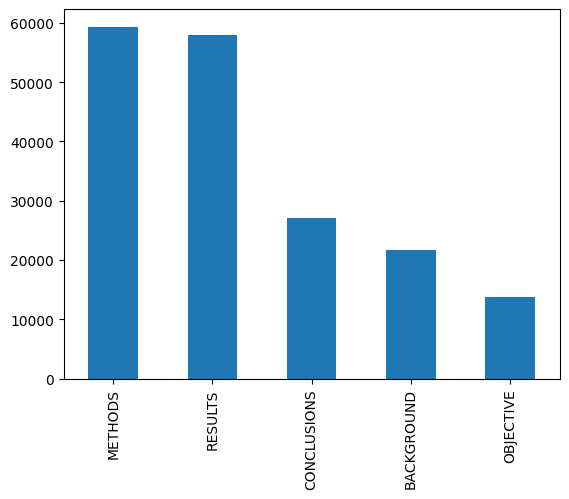

In [14]:
#Distributions of labels
train_df.target.value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

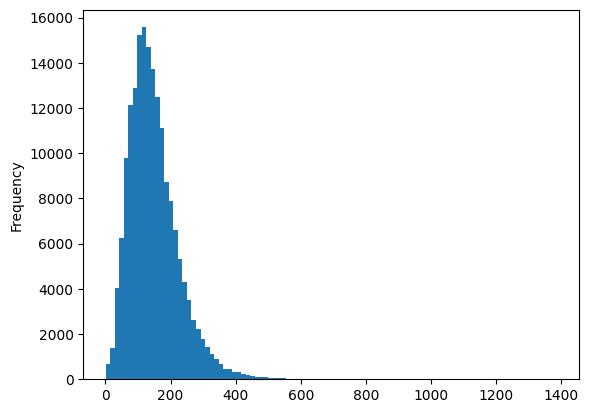

In [15]:
train_df.text.str.len().plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

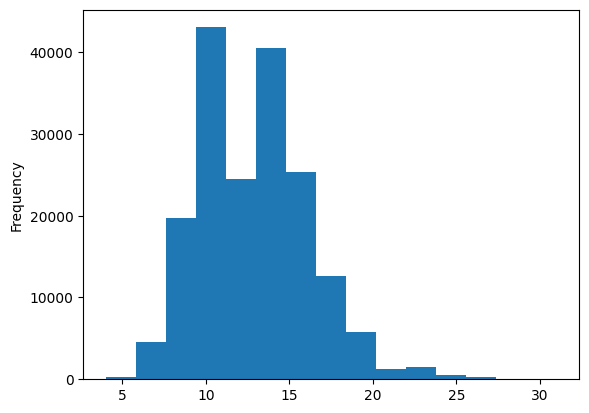

In [16]:
train_df.total_lines.plot.hist(bins=15)


##Get text for train, test and val as list

In [17]:
train_sentences = train_df['text'].str.lower().to_list()
val_sentences = dev_df['text'].str.lower().to_list()
test_sentences = test_df['text'].str.lower().to_list()

In [18]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Encode target using OneHotEncoder and LabelEncoder

In [19]:
from tensorflow.python.ops.gen_array_ops import one_hot
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

In [20]:
y_train_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
y_test_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))
y_val_one_hot = one_hot_encoder.transform(dev_df['target'].to_numpy().reshape(-1,1))

y_train_one_hot


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [21]:
one_hot_encoder.categories_

[array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object)]

In [22]:
y_train_categorical = label_encoder.fit_transform(train_df['target'].to_numpy())
y_test_categorical = label_encoder.transform(test_df['target'].to_numpy())
y_val_categorical = label_encoder.transform(dev_df['target'].to_numpy())

y_train_categorical


array([3, 2, 2, ..., 4, 1, 1])

In [23]:
label_encoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## Create a base model using TF-IDF and Native Bayes

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [25]:
tfidf = TfidfVectorizer()

tfidf.fit(train_sentences)

X_train = tfidf.transform(train_sentences)
X_test = tfidf.transform(test_sentences)
X_val = tfidf.transform(val_sentences)

In [26]:
X_train.shape, X_test.shape, X_val.shape


((180040, 45871), (30135, 45871), (30212, 45871))

In [27]:
print(f"Vocabulary len is {len(tfidf.vocabulary_)}")

Vocabulary len is 45871


In [28]:
clf = MultinomialNB()
clf.fit(X_train, y_train_categorical)

clf.score(X_val, y_val_categorical)


0.7218323844829869

In [29]:
y_test_categorical_pred = clf.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


In [31]:
print(classification_report(y_test_categorical, y_test_categorical_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

  BACKGROUND       0.65      0.47      0.54      3621
 CONCLUSIONS       0.63      0.58      0.60      4571
     METHODS       0.72      0.88      0.79      9897
   OBJECTIVE       0.74      0.13      0.22      2333
     RESULTS       0.76      0.85      0.80      9713

    accuracy                           0.72     30135
   macro avg       0.70      0.58      0.59     30135
weighted avg       0.71      0.72      0.69     30135



In [32]:
y_val_categorical_pred = clf.predict(X_val)
print(classification_report(y_val_categorical, y_val_categorical_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

  BACKGROUND       0.66      0.49      0.56      3449
 CONCLUSIONS       0.65      0.59      0.61      4582
     METHODS       0.72      0.87      0.79      9964
   OBJECTIVE       0.75      0.14      0.23      2376
     RESULTS       0.76      0.86      0.81      9841

    accuracy                           0.72     30212
   macro avg       0.71      0.59      0.60     30212
weighted avg       0.72      0.72      0.70     30212



In [33]:
def calculate_results(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='weighted')
  rec = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  print(f"Accuracy : {acc}")
  print(f"Precision : {prec}")
  print(f"Recall : {rec}")
  print(f"F1 : {f1}")

In [34]:
calculate_results(y_val_categorical, y_val_categorical_pred)

Accuracy : 0.7218323844829869
Precision : 0.7186466952323352
Recall : 0.7218323844829869
F1 : 0.6989250353450294


## Cretae Conv1D model using Embbeding

In [35]:
# Prepare data to embbedding
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import numpy as np

In [36]:
len(train_sentences)

180040

In [37]:
train_sentences[3]

'pain was assessed using the visual analog pain scale ( @-@ mm ) .'

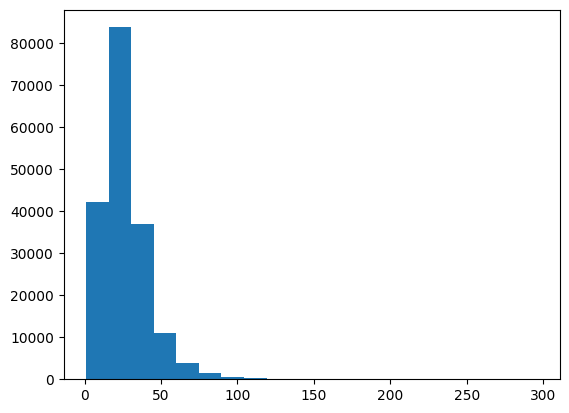

In [38]:
import matplotlib.pyplot as plt

lens = [len(x.split()) for x in train_sentences]
plt.hist(lens, bins = 20);


In [39]:
np.max(lens), np.mean(lens), np.min(lens)

(296, 26.338269273494777, 1)

In [40]:
np.quantile(lens, 0.95)

55.0

In [41]:
max_vocab_length = 68000
max_length = 55

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_sequence_length=max_length)

text_vectorizer.adapt(train_sentences)

In [42]:
text_vectorizer(train_sentences[10])

<tf.Tensor: shape=(55,), dtype=int64, numpy=
array([    2,    86,   213,     5,  4358,    47, 33550,   285,  1702,
         848,  3555,    78,    10,     5,     2,    38,    13,     3,
           5,     2,    48,    13,    14,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])>

In [43]:
y_train_categorical[10]

4

In [44]:
y_train_one_hot[10]

array([0., 0., 0., 0., 1.])

In [45]:
# create Conv1D model
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalMaxPool1D, Dropout, Input, Embedding, Dense

def create_con1D_model():
  embedding_dim=64

  modelConv1D = tf.keras.Sequential()
  modelConv1D.add(Input(shape=(1,), dtype=tf.string))
  modelConv1D.add(text_vectorizer)
  modelConv1D.add(Embedding(max_vocab_length, embedding_dim, input_length=max_length))
  modelConv1D.add(Conv1D(32, 3, activation='relu'))
  modelConv1D.add(GlobalMaxPool1D())
  modelConv1D.add(Dense(16, activation='relu'))
  modelConv1D.add(Dropout(0.5))
  modelConv1D.add(Dense(5, activation='softmax'))

  modelConv1D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return modelConv1D

In [46]:
modelConv1D = create_con1D_model()
modelConv1D.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 64)            4352000   
                                                                 
 conv1d (Conv1D)             (None, 53, 32)            6176      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0

In [47]:
train_sentences = np.array(train_sentences)
val_sentences = np.array(val_sentences)


In [48]:
train_sentences.dtype

dtype('<U1386')

In [49]:
type(train_sentences)

numpy.ndarray

In [50]:
y_val_one_hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [51]:
historyConv1D = modelConv1D.fit(
    train_sentences,
    y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_data=(val_sentences, y_val_one_hot))

Epoch 1/10
5627/5627 [==============================] - 99s 16ms/step - loss: 0.7841 - accuracy: 0.7025 - val_loss: 0.5437 - val_accuracy: 0.8024
Epoch 2/10
5627/5627 [==============================] - 46s 8ms/step - loss: 0.6200 - accuracy: 0.7629 - val_loss: 0.5214 - val_accuracy: 0.8099
Epoch 3/10
5627/5627 [==============================] - 43s 8ms/step - loss: 0.5404 - accuracy: 0.7875 - val_loss: 0.5298 - val_accuracy: 0.8090
Epoch 4/10
5627/5627 [==============================] - 47s 8ms/step - loss: 0.4766 - accuracy: 0.8087 - val_loss: 0.5662 - val_accuracy: 0.8044
Epoch 5/10
5627/5627 [==============================] - 52s 9ms/step - loss: 0.4254 - accuracy: 0.8248 - val_loss: 0.6168 - val_accuracy: 0.8001
Epoch 6/10
5627/5627 [==============================] - 46s 8ms/step - loss: 0.3875 - accuracy: 0.8368 - val_loss: 0.6790 - val_accuracy: 0.7942
Epoch 7/10
5627/5627 [==============================] - 44s 8ms/step - loss: 0.3577 - accuracy: 0.8458 - val_loss: 0.7553 - val_a

<Axes: >

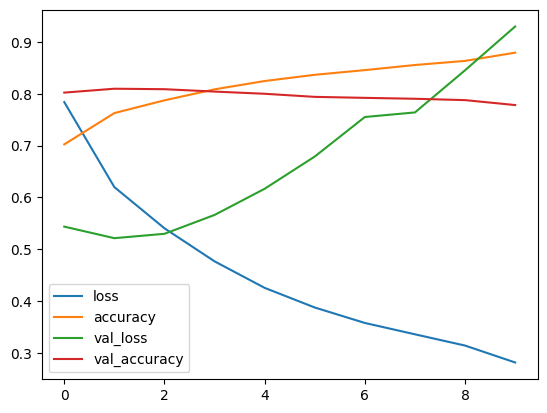

In [52]:
pd.DataFrame(historyConv1D.history).plot()

In [53]:
# create dataset for train and callbacks for training
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, y_train_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, y_val_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, y_test_one_hot))

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [54]:
modelConv1D_2 = create_con1D_model()
modelConv1D_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 55, 64)            4352000   
                                                                 
 conv1d_1 (Conv1D)           (None, 53, 32)            6176      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)               

In [55]:
historyConv1D_2 = modelConv1D_2.fit(
    train_dataset,
    steps_per_epoch=int(len(train_dataset)*0.1),
    epochs=5,
    validation_data=val_dataset,
    validation_steps=int(len(train_dataset)*0.1))

Epoch 1/5
562/562 [==============================] - 31s 53ms/step - loss: 1.1493 - accuracy: 0.5140 - val_loss: 0.7678 - val_accuracy: 0.7260
Epoch 2/5
562/562 [==============================] - 10s 17ms/step - loss: 0.8482 - accuracy: 0.6764 - val_loss: 0.6569 - val_accuracy: 0.7666
Epoch 3/5
562/562 [==============================] - 7s 12ms/step - loss: 0.7909 - accuracy: 0.6986 - val_loss: 0.6144 - val_accuracy: 0.7812
Epoch 4/5
562/562 [==============================] - 5s 9ms/step - loss: 0.7561 - accuracy: 0.7175 - val_loss: 0.5939 - val_accuracy: 0.7874
Epoch 5/5
562/562 [==============================] - 7s 12ms/step - loss: 0.7420 - accuracy: 0.7281 - val_loss: 0.5733 - val_accuracy: 0.7918


<Axes: >

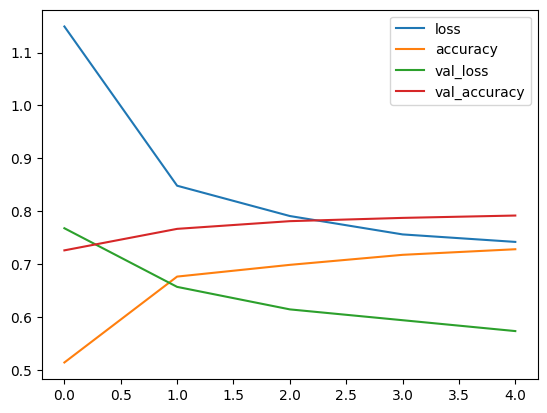

In [56]:
pd.DataFrame(historyConv1D_2.history).plot()


In [57]:
modelConv1D_2.evaluate(val_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5808 - accuracy: 0.7896


[0.5807731747627258, 0.7895538210868835]

In [58]:
modelConv1D_2.evaluate(test_dataset)

942/942 [==============================] - 3s 3ms/step - loss: 0.5999 - accuracy: 0.7819


[0.5998702645301819, 0.7819147109985352]

In [59]:
val_predicts1 = modelConv1D_2.predict(val_dataset)


945/945 [==============================] - 3s 3ms/step


In [60]:
val_predicts1

array([[4.38839793e-01, 3.42835903e-01, 3.04349195e-02, 1.75308362e-01,
        1.25810727e-02],
       [3.12133759e-01, 4.94461983e-01, 3.06315646e-02, 1.31215140e-01,
        3.15575004e-02],
       [3.74879479e-01, 4.48812395e-02, 5.66780157e-02, 5.14715195e-01,
        8.84604361e-03],
       ...,
       [1.91458603e-05, 2.69553671e-03, 2.28465721e-02, 3.08681615e-06,
        9.74435687e-01],
       [6.93601817e-02, 2.95331895e-01, 1.09251156e-01, 4.50338349e-02,
        4.81022865e-01],
       [1.88869238e-01, 6.25429511e-01, 1.05302244e-01, 2.80390810e-02,
        5.23599871e-02]], dtype=float32)

In [61]:
val_predicts1.shape

(30212, 5)

In [62]:
val_predicts1.argmax(axis=1)


array([0, 1, 3, ..., 4, 4, 1])

In [63]:
calculate_results(y_val_categorical, val_predicts1.argmax(axis=1))

Accuracy : 0.7895538196743016
Precision : 0.787277331012111
Recall : 0.7895538196743016
F1 : 0.7857575706812808


In [64]:
print(classification_report(y_val_categorical, val_predicts1.argmax(axis=1), target_names=label_encoder.classes_))

              precision    recall  f1-score   support

  BACKGROUND       0.57      0.62      0.59      3449
 CONCLUSIONS       0.69      0.67      0.68      4582
     METHODS       0.85      0.91      0.88      9964
   OBJECTIVE       0.71      0.45      0.55      2376
     RESULTS       0.86      0.87      0.86      9841

    accuracy                           0.79     30212
   macro avg       0.74      0.70      0.71     30212
weighted avg       0.79      0.79      0.79     30212



## Create Conv1D using prentraining embedding using universal-sentence-encoder from Tensorflow Hub

In [65]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [66]:
def create_use_model():
  model = tf.keras.Sequential()
  model.add(Input(shape=[], dtype=tf.string))
  model.add(hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder"))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(5, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [67]:
train_sentences[0]

'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .'

In [68]:
embed([train_sentences[0]]).shape


TensorShape([1, 512])

In [69]:
model_use = create_use_model()
model_use.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_4 (Dense)             (None, 16)                8208      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 256,806,117
Trainable params: 8,293
Non-trainable params: 256,797,824
_________________________________________________________________


In [70]:
hisory_use = model_use.fit(
    train_dataset,
    steps_per_epoch=int(len(train_dataset)*0.1),
    epochs=5,
    validation_data=val_dataset,
    validation_steps=int(len(train_dataset)*0.1))

Epoch 1/5
562/562 [==============================] - 17s 24ms/step - loss: 1.1878 - accuracy: 0.5168 - val_loss: 0.9527 - val_accuracy: 0.6417
Epoch 2/5
562/562 [==============================] - 13s 23ms/step - loss: 0.9993 - accuracy: 0.5970 - val_loss: 0.8751 - val_accuracy: 0.6644
Epoch 3/5
562/562 [==============================] - 13s 22ms/step - loss: 0.9585 - accuracy: 0.6127 - val_loss: 0.8435 - val_accuracy: 0.6724
Epoch 4/5
562/562 [==============================] - 13s 22ms/step - loss: 0.9307 - accuracy: 0.6284 - val_loss: 0.8301 - val_accuracy: 0.6754
Epoch 5/5
562/562 [==============================] - 13s 22ms/step - loss: 0.9361 - accuracy: 0.6248 - val_loss: 0.8157 - val_accuracy: 0.6826


In [71]:
val_predicts_usa = model_use.predict(val_dataset)

945/945 [==============================] - 11s 11ms/step


In [72]:
calculate_results(y_val_categorical, val_predicts_usa.argmax(axis=1))

Accuracy : 0.6795313120614326
Precision : 0.680082714416192
Recall : 0.6795313120614326
F1 : 0.6642695177405429


In [73]:
val_predicts_usa = model_use.predict(val_dataset)

945/945 [==============================] - 10s 11ms/step


## Create model using characters embeddibgs

In [74]:
## Create a character leval vectorizer
def split_chars(text):
  return " ".join(list(text))


In [75]:
train_sentences_chars = [split_chars(sentence) for sentence in train_sentences]
val_sentences_chars = [split_chars(sentence) for sentence in val_sentences]
test_sentences_char = [split_chars(sentence) for sentence in test_sentences]


In [76]:
val_sentences[0], train_sentences[0], test_sentences[0]


('ige sensitization to aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .',
 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'this study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( adhf ) .')

In [77]:
len(train_sentences_chars[1]), len(train_sentences[1])

(273, 137)

In [78]:
len(train_sentences[1])

137

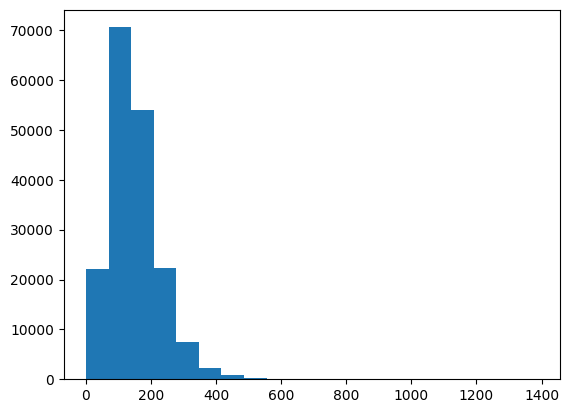

In [79]:
## check the distribution of lens

char_lens = [len(sentence) for sentence in train_sentences]

plt.hist(char_lens, bins=20);

In [80]:
np.quantile(char_lens, 0.95)


290.0

In [81]:
len(train_sentences_chars[1])

273

In [82]:
len(train_sentences[1])

137

In [83]:
train_sentences[1]

'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .'

In [84]:
train_sentences_chars[1]

'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .'

In [85]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
len(alphabet)


68

In [86]:
NUM_CHAR_TOKENS = len(alphabet) + 2 # add 2 for space and OOV token (OOV = out of vocabulary)
SEQUENCE_LENGTH = int(np.quantile(char_lens, 0.95))

chart_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=SEQUENCE_LENGTH)

In [87]:
chart_vectorizer.adapt(train_sentences_chars)


In [88]:
chack_vocab = chart_vectorizer.get_vocabulary()
chack_vocab[:10]


['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's']

In [89]:
len(chack_vocab)

28

In [90]:
##test char vectorizer
import random
random_train_chars = random.choice(train_sentences_chars)
print(f"Charified text:\n {random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = chart_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n {vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")




Charified text:
 l d l - c   a l s o   d e c r e a s e d   b y   m o r e   t h a n   @   %   (   p   <   @   )   a n d   t r i g l y c e r i d e s   i n c r e a s e d   b y   a p p r o x i m a t e l y   @ - f o l d   (   p   <   @   )   .

Length of chars: 87

Vectorized chars:
 [[12 10 12 11  5 12  9  7 10  2 11  8  2  5  9  2 10 22 19 15  7  8  2  3
  13  5  6 14  5  6 10  3  8  4 18 12 19 11  2  8  4 10  2  9  4  6 11  8
   2  5  9  2 10 22 19  5 14 14  8  7 24  4 15  5  3  2 12 19 17  7 12 10
  14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [91]:
SEQUENCE_LENGTH, NUM_CHAR_TOKENS

(290, 70)

In [92]:
# create datasets fro chars represantation
train_dataset_cr = tf.data.Dataset.from_tensor_slices((train_sentences_chars, y_train_one_hot))
val_dataset_cr = tf.data.Dataset.from_tensor_slices((val_sentences_chars, y_val_one_hot))
test_dataset_cr = tf.data.Dataset.from_tensor_slices((test_sentences_char, y_test_one_hot))

train_dataset_cr = train_dataset_cr.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_cr = val_dataset_cr.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset_cr = test_dataset_cr.batch(32).prefetch(tf.data.AUTOTUNE)

In [93]:
## create model
def create_chars_model(embedding_dim = 55):
  model = tf.keras.Sequential()
  model.add(Input(shape=(1,), dtype=tf.string))
  model.add(chart_vectorizer)
  model.add(Embedding(NUM_CHAR_TOKENS, embedding_dim))
  model.add(Conv1D(32, 3, activation='relu'))
  model.add(GlobalMaxPool1D())
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(5, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [94]:
char_model = create_chars_model()
char_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 290, 55)           3850      
                                                                 
 conv1d_2 (Conv1D)           (None, 288, 32)           5312      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)               

In [95]:
hisory_char = char_model.fit(
    train_dataset_cr,
    steps_per_epoch=int(len(train_dataset_cr)*0.1),
    epochs=5,
    validation_data=val_dataset_cr,
    validation_steps=int(len(val_dataset_cr)*0.1))

Epoch 1/5
562/562 [==============================] - 7s 9ms/step - loss: 1.4057 - accuracy: 0.4055 - val_loss: 1.2244 - val_accuracy: 0.4953
Epoch 2/5
562/562 [==============================] - 4s 6ms/step - loss: 1.2299 - accuracy: 0.4822 - val_loss: 1.1028 - val_accuracy: 0.5605
Epoch 3/5
562/562 [==============================] - 4s 6ms/step - loss: 1.1797 - accuracy: 0.5190 - val_loss: 1.0429 - val_accuracy: 0.5884
Epoch 4/5
562/562 [==============================] - 4s 7ms/step - loss: 1.1372 - accuracy: 0.5374 - val_loss: 1.0372 - val_accuracy: 0.5941
Epoch 5/5
562/562 [==============================] - 3s 6ms/step - loss: 1.1218 - accuracy: 0.5439 - val_loss: 1.0075 - val_accuracy: 0.5977


In [96]:
# create bi-LSTM model using charactes embedding
from tensorflow.keras.layers import LSTM, Bidirectional

def create_chars_lstm_model(embedding_dim = 55):
  model = tf.keras.Sequential()
  model.add(Input(shape=(1,), dtype=tf.string))
  model.add(chart_vectorizer)
  model.add(Embedding(NUM_CHAR_TOKENS, embedding_dim))
  model.add(Bidirectional(LSTM(32)))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(5, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [97]:
char_lstm_model = create_chars_lstm_model()
char_lstm_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 290, 55)           3850      
                                                                 
 bidirectional (Bidirectiona  (None, 64)               22528     
 l)                                                              
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                

In [98]:
hisory_char_lstm = char_lstm_model.fit(
    train_dataset_cr,
    steps_per_epoch=int(len(train_dataset_cr)*0.1),
    epochs=10,
    validation_data=val_dataset_cr,
    validation_steps=int(len(train_dataset_cr)*0.1))

Epoch 1/10
562/562 [==============================] - 24s 32ms/step - loss: 1.4559 - accuracy: 0.3453 - val_loss: 1.3935 - val_accuracy: 0.4051
Epoch 2/10
562/562 [==============================] - 17s 29ms/step - loss: 1.3667 - accuracy: 0.3969 - val_loss: 1.2963 - val_accuracy: 0.4509
Epoch 3/10
562/562 [==============================] - 17s 31ms/step - loss: 1.3164 - accuracy: 0.4359 - val_loss: 1.2290 - val_accuracy: 0.4879
Epoch 4/10
562/562 [==============================] - 17s 30ms/step - loss: 1.2733 - accuracy: 0.4533 - val_loss: 1.1927 - val_accuracy: 0.5058
Epoch 5/10
562/562 [==============================] - 22s 39ms/step - loss: 1.2406 - accuracy: 0.4692 - val_loss: 1.1448 - val_accuracy: 0.5272
Epoch 6/10
562/562 [==============================] - 17s 30ms/step - loss: 1.2186 - accuracy: 0.4838 - val_loss: 1.1303 - val_accuracy: 0.5382
Epoch 7/10
562/562 [==============================] - 17s 30ms/step - loss: 1.1874 - accuracy: 0.4978 - val_loss: 1.1334 - val_accuracy:

In [99]:
predict_lstm = char_lstm_model.predict(test_dataset_cr)

calculate_results(y_test_categorical, predict_lstm.argmax(axis=1))


942/942 [==============================] - 10s 10ms/step
Accuracy : 0.5784303965488634
Precision : 0.5795680049238574
Recall : 0.5784303965488634
F1 : 0.571047760732325


In [100]:
predict_val_lstm = char_lstm_model.predict(val_dataset_cr)

calculate_results(y_val_categorical, predict_val_lstm.argmax(axis=1))

945/945 [==============================] - 9s 10ms/step
Accuracy : 0.5865881106844962
Precision : 0.5881203456379237
Recall : 0.5865881106844962
F1 : 0.5795899238131819


## Concatenate inputs chars embedding and token embeddings

In [101]:
NUM_TOKEN_TOKENS = 68000
NUM_CHAR_TOKENS = len(alphabet) + 2

In [102]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Model


In [103]:
from tensorflow.keras.layers import Concatenate


#1. Create token level embeddings
#2. Create char level embeddings
#3. Concatenate token and char level embeddings
#4. Build model

token_input = Input(shape=[], dtype=tf.string)
token_embedding = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")(token_input)
token_model = tf.keras.Model(inputs=token_input, outputs=token_embedding)

char_input = Input(shape=(1,), dtype=tf.string)
char_vectors = chart_vectorizer(char_input)
char_embedding = Embedding(NUM_CHAR_TOKENS, 25) (char_vectors)
lstm_layer = Bidirectional(LSTM(32))(char_embedding)

char_model = tf.keras.Model(inputs=char_input, outputs=lstm_layer)

token_char_concat = Concatenate(name="token_char_hybrid")([token_model.output,
                                                            char_model.output])

combined_dropout = Dropout(0.5)(token_char_concat)
dence_combined = Dense(128)(combined_dropout)
dence_combined_dropout = Dropout(0.5)(dence_combined)
model_output = Dense(5, activation="softmax")(dence_combined_dropout)

token_char_model = Model(inputs=[token_model.input, char_model.input],
                         outputs=model_output)


token_char_model.compile(loss="categorical_crossentropy",
                         optimizer="adam",
                         metrics=["accuracy"])


In [104]:
token_char_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['input_7[0][0]']                
 orization)                                                                                       
                                                                                                  
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 290, 25)      1750        ['text_vectorization_1[2][0

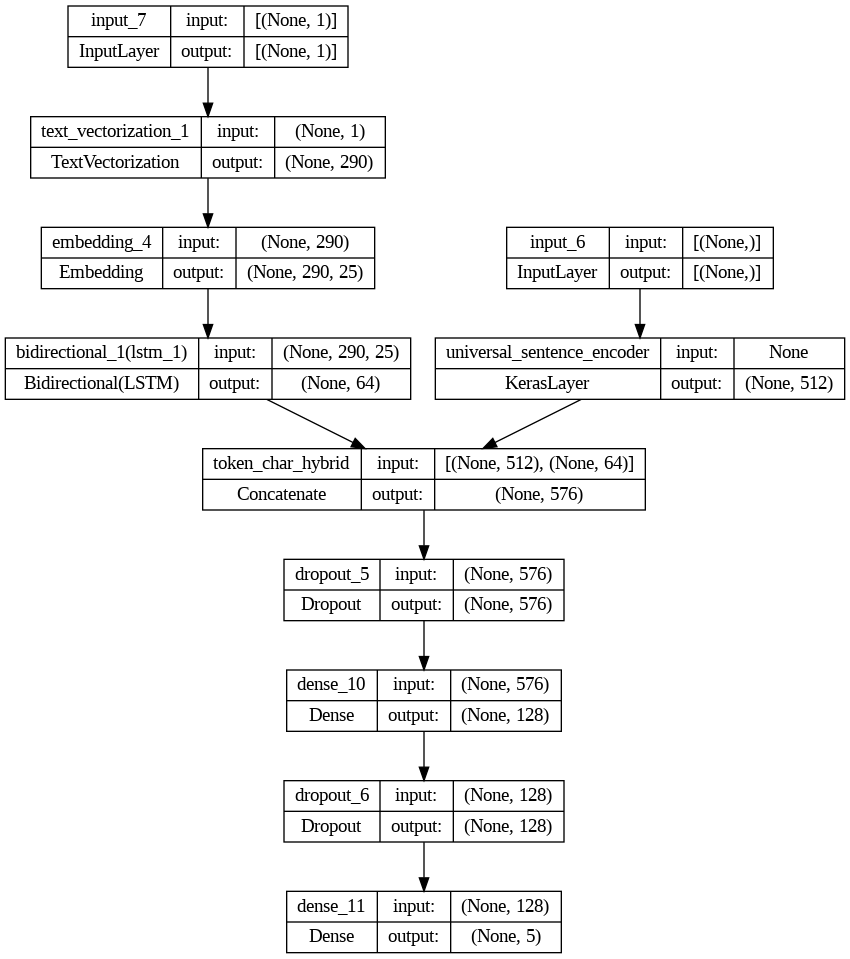

In [105]:
from keras.utils.vis_utils import plot_model
plot_model(token_char_model, show_shapes=True, show_layer_names=True)


In [106]:
#Combining token and character data into a tf.data dataset

#train dataset
combining_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_sentences_chars))
combining_lables = tf.data.Dataset.from_tensor_slices(y_train_one_hot)
combining_dataset = tf.data.Dataset.zip((combining_data, combining_lables))

combining_dataset = combining_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

#validation dataset

val_combining_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_sentences_chars))
val_combining_lables = tf.data.Dataset.from_tensor_slices(y_val_one_hot)
val_combining_dataset = tf.data.Dataset.zip((val_combining_data, val_combining_lables))

val_combining_dataset = val_combining_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [107]:
token_char_model.fit(combining_dataset,
                     steps_per_epoch=int(len(combining_dataset)*0.1),
                     epochs=5,
                     validation_data=val_combining_dataset,
                     validation_steps=int(len(val_combining_dataset)*0.1) )

Epoch 1/5
562/562 [==============================] - 26s 34ms/step - loss: 1.0005 - accuracy: 0.6113 - val_loss: 0.8080 - val_accuracy: 0.6918
Epoch 2/5
562/562 [==============================] - 19s 33ms/step - loss: 0.8718 - accuracy: 0.6640 - val_loss: 0.7698 - val_accuracy: 0.7094
Epoch 3/5
562/562 [==============================] - 19s 34ms/step - loss: 0.8750 - accuracy: 0.6650 - val_loss: 0.7667 - val_accuracy: 0.7091
Epoch 4/5
562/562 [==============================] - 19s 33ms/step - loss: 0.8516 - accuracy: 0.6724 - val_loss: 0.7598 - val_accuracy: 0.7124
Epoch 5/5
562/562 [==============================] - 18s 32ms/step - loss: 0.8656 - accuracy: 0.6648 - val_loss: 0.7552 - val_accuracy: 0.7118


In [108]:
token_char_model.evaluate(val_combining_dataset)



945/945 [==============================] - 18s 19ms/step - loss: 0.7564 - accuracy: 0.7155


[0.7563623189926147, 0.7154772877693176]

In [109]:
combining_predict = token_char_model.predict(val_combining_dataset)

calculate_results(y_val_categorical, combining_predict.argmax(axis=1))


945/945 [==============================] - 19s 19ms/step
Accuracy : 0.7154772937905468
Precision : 0.7144083345797165
Recall : 0.7154772937905468
F1 : 0.7093250368012529


In [110]:
calculate_results(y_val_categorical, y_val_categorical_pred)

Accuracy : 0.7218323844829869
Precision : 0.7186466952323352
Recall : 0.7218323844829869
F1 : 0.6989250353450294


In [111]:
calculate_results(y_val_categorical, val_predicts1.argmax(axis=1))

Accuracy : 0.7895538196743016
Precision : 0.787277331012111
Recall : 0.7895538196743016
F1 : 0.7857575706812808


## Create model using order of sentences

In [112]:
train_df.head()

,number,target,text,line_number,total_lines
0,24293578\n,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,1,12
1,24293578\n,METHODS,A total of @ patients with primary knee OA wer...,2,12
2,24293578\n,METHODS,Outcome measures included pain reduction and i...,3,12
3,24293578\n,METHODS,Pain was assessed using the visual analog pain...,4,12
4,24293578\n,METHODS,Secondary outcome measures included the Wester...,5,12


In [113]:
train_df["line_number"].value_counts()

1     15000
2     15000
3     15000
4     15000
5     14992
6     14949
7     14758
8     14279
9     13346
10    11981
11    10041
12     7892
13     5853
14     4152
15     2835
16     1861
17     1188
18      751
19      462
20      286
21      162
22      101
23       66
24       33
25       22
26       14
27        7
28        4
29        3
30        1
31        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

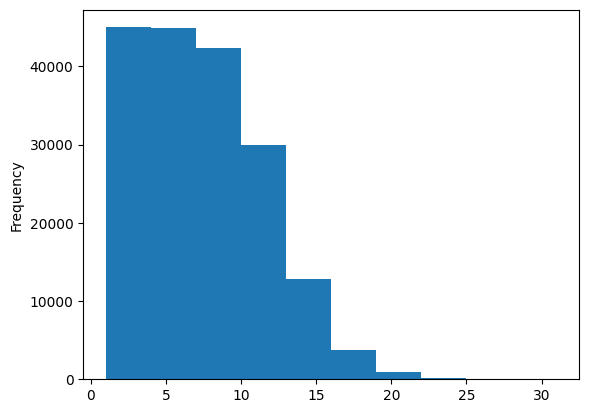

In [114]:
train_df["line_number"].plot.hist()


In [115]:
np.percentile(train_df["line_number"].values, 98)


16.0

In [116]:
dev_df.head()


,number,target,text,line_number,total_lines
0,24290286\n,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...,1,10
1,24290286\n,BACKGROUND,It is not clear whether these patients would b...,2,10
2,24290286\n,OBJECTIVE,We sought to determine whether a @-month cours...,3,10
3,24290286\n,METHODS,Asthmatic patients who were IgE sensitized to ...,4,10
4,24290286\n,METHODS,Primary outcomes were improvement in quality o...,5,10


In [117]:
line_numers = 16
train_one_hot_order=tf.one_hot(train_df["line_number"].values, depth=line_numers)
val_one_hot_order=tf.one_hot(dev_df["line_number"].values, depth=line_numers)
test_one_hot_order=tf.one_hot(test_df["line_number"].values, depth=line_numers)

In [118]:
train_one_hot_order.shape, val_one_hot_order.shape, test_one_hot_order.shape

(TensorShape([180040, 16]), TensorShape([30212, 16]), TensorShape([30135, 16]))

In [119]:
val_one_hot_order[0]

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [120]:
train_df["total_lines"].value_counts()

12    24468
11    23639
13    22113
10    19400
14    18438
15    14610
9     12285
16    10768
8      7464
17     7429
18     5202
7      3353
19     3344
20     2480
21     1281
6      1146
22      770
23      759
24      264
5       215
25      200
26      182
27       81
29       58
4        32
31       31
28       28
Name: total_lines, dtype: int64

21.0


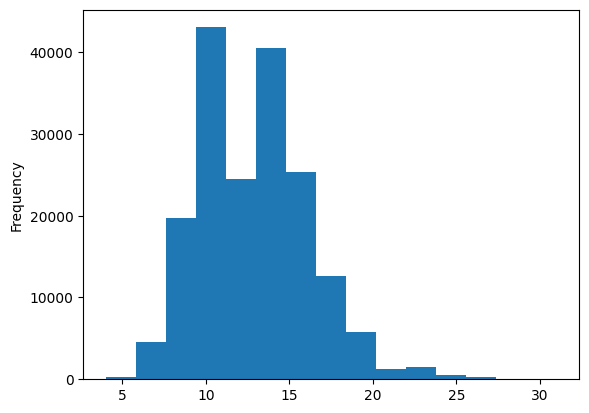

In [121]:
# one hot encode for tatal lines numbers

train_df["total_lines"].plot.hist(bins=15)
print(np.percentile(train_df.total_lines, 98))

In [122]:
train_df["total_lines"].dtype

dtype('int64')

In [123]:
total_lines = 21
train_one_hot_total_ln=tf.one_hot(train_df["total_lines"].values, depth=total_lines)
val_one_hot_total_ln=tf.one_hot(dev_df["total_lines"].values, depth=total_lines)
test_one_hot_total_ln=tf.one_hot(test_df["total_lines"].values, depth=total_lines)

In [124]:
train_one_hot_total_ln.shape, val_one_hot_total_ln.shape, test_one_hot_total_ln.shape


(TensorShape([180040, 21]), TensorShape([30212, 21]), TensorShape([30135, 21]))

In [125]:
from itertools import combinations
#1. Create token level embeddings

token_input = Input(shape=[], dtype=tf.string)
token_embedding = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")(token_input)
token_model = tf.keras.Model(inputs=token_input, outputs=token_embedding)

#2. Create char level embeddings

char_input = Input(shape=(1,), dtype=tf.string)
char_vectors = chart_vectorizer(char_input)
char_embedding = Embedding(NUM_CHAR_TOKENS, 25) (char_vectors)
lstm_layer = Bidirectional(LSTM(32))(char_embedding)

char_model = tf.keras.Model(inputs=char_input, outputs=lstm_layer)

# 3. Create a model fro line numer features

line_number_input = Input(shape=(line_numers,), dtype=tf.int32)
line_number_vectors = Dense(32, activation="relu")(line_number_input)
line_number_model = tf.keras.Model(inputs=line_number_input,
                                   outputs=line_number_vectors)

# 4. Create a model for total numbers features

total_number_input = Input(shape=(total_lines,), dtype=tf.int32)
total_number_vectors = Dense(32, activation="relu")(total_number_input)
total_number_model = tf.keras.Model(inputs=total_number_input,
                                   outputs=total_number_vectors)

# 5. Concatenate all tokens and characters
token_char_concat = Concatenate(name="token_char_hybrid")([token_model.output,
                                                            char_model.output])

dence_combined = Dense(128)(token_char_concat)
combined_dropout = Dropout(0.5)(dence_combined)

# Concatenate dence_combined and line number and total number layers

z = Concatenate(name="token_char_positional")([line_number_model.output,
                                                total_number_model.output,
                                                combined_dropout])

#dence_combined_dropout = Dropout(0.5)(dence_combined)
model_output = Dense(5, activation="softmax")(z)

combinations_model = Model(inputs=[line_number_model.input,
                      total_number_model.input,
                      token_model.input,
                      char_model.input],
              outputs=model_output)

combinations_model.compile(loss="categorical_crossentropy",
                         optimizer="adam",
                         metrics=["accuracy"])

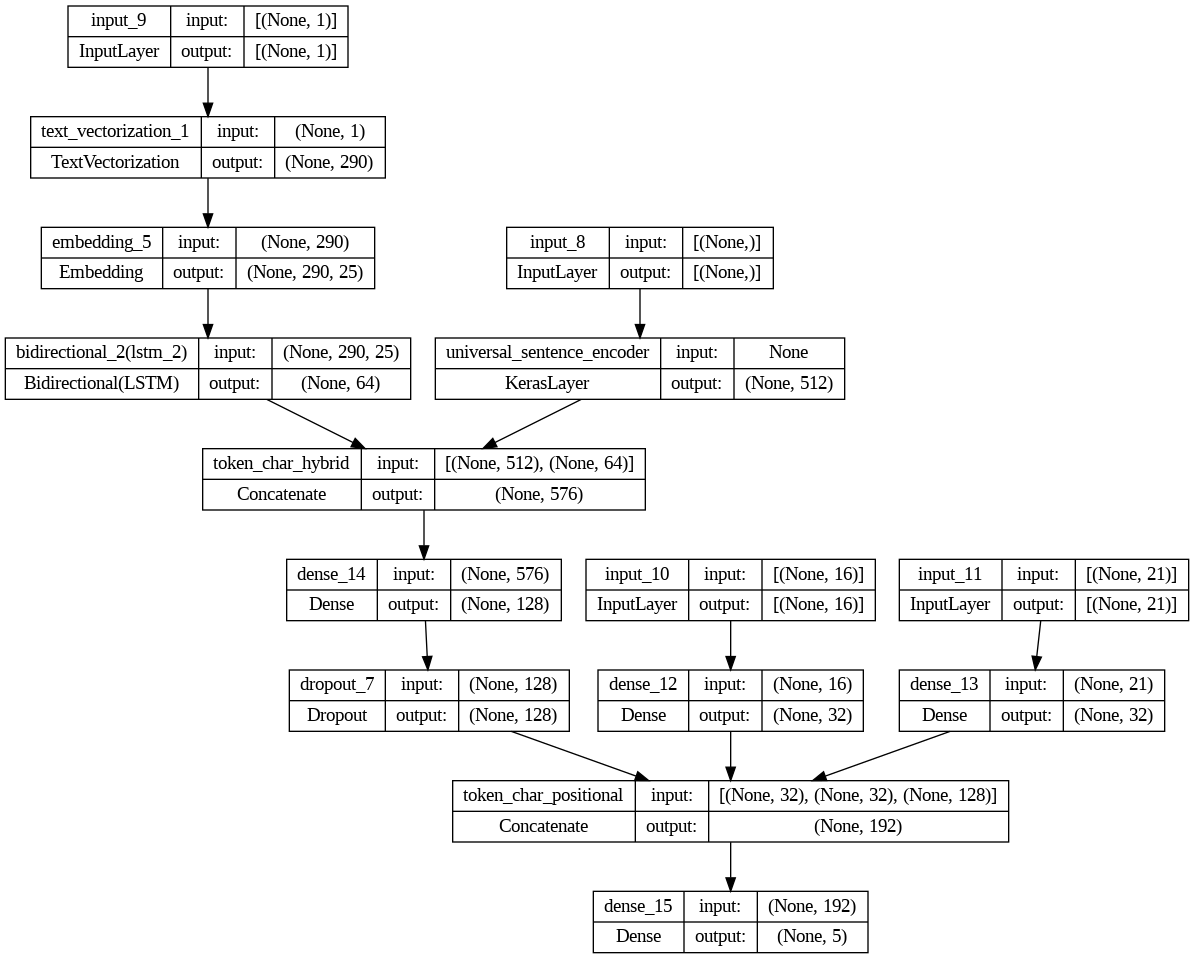

In [126]:
plot_model(combinations_model, show_shapes=True)


In [134]:
# Create datasets to fit a combinations_model model

#train dataset
x_data = tf.data.Dataset.from_tensor_slices((train_one_hot_order, train_one_hot_total_ln, train_sentences, train_sentences_chars))
y = tf.data.Dataset.from_tensor_slices(y_train_one_hot)
xy_dataset = tf.data.Dataset.zip((x_data, y))

xy_dataset = xy_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [135]:
xy_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), TensorSpec(shape=(None, 21), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [136]:
#validation dataset
val_x_data = tf.data.Dataset.from_tensor_slices((val_one_hot_order, val_one_hot_total_ln, val_sentences, val_sentences_chars))
val_y_lables = tf.data.Dataset.from_tensor_slices(y_val_one_hot)
val_xy_dataset = tf.data.Dataset.zip((val_x_data, val_y_lables))

val_xy_dataset = val_xy_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [141]:
combinations_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                         optimizer="adam",
                         metrics=["accuracy"])

In [147]:
combinations_model.fit(xy_dataset,
                       steps_per_epoch=int(len(xy_dataset)*0.5),
                       epochs=3,
                       validation_data=val_xy_dataset,
                       validation_steps=int(len(val_xy_dataset)*0.5)
                       )


Epoch 1/3
2813/2813 [==============================] - 99s 35ms/step - loss: 0.9634 - accuracy: 0.8246 - val_loss: 0.9485 - val_accuracy: 0.8333
Epoch 2/3
2813/2813 [==============================] - 94s 33ms/step - loss: 0.9598 - accuracy: 0.8247 - val_loss: 0.9426 - val_accuracy: 0.8361
Epoch 3/3
   1/2813 [..............................] - ETA: 1:30 - loss: 0.9826 - accuracy: 0.6250

2813/2813 [==============================] - 8s 3ms/step - loss: 0.9826 - accuracy: 0.6250 - val_loss: 0.9425 - val_accuracy: 0.8361


In [148]:
comb_predict = combinations_model.predict(val_xy_dataset)

calculate_results(y_val_categorical, comb_predict.argmax(axis=1))

945/945 [==============================] - 19s 20ms/step
Accuracy : 0.8349662385806964
Precision : 0.8351786216381182
Recall : 0.8349662385806964
F1 : 0.8323938793406145


In [ ]:
combinations_model.save("combinations_model")
